In [1]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Carregando os dados
dados = pd.read_csv('ENADE2017/dados/microdados_ENADE_2017.csv', sep=';')

/home/mateusqc/workspace/MC_2019.2/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (29,31,32,44,45,46,47,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dados = dados.filter(['NT_GER', 'QE_I08'])
dados

,NT_GER,QE_I08
0,"52,6",B
1,"63,1",B
2,"33,7",F
3,"58,1",B
4,"46,3",F
...,...,...
537431,NaN,C
537432,NaN,B
537433,NaN,B
537434,NaN,C


In [4]:
dados['NT_GER'].replace(regex=True, inplace=True, to_replace=r'\,\\?', value=r'.')

In [5]:
dados_filtrados = dados[dados['NT_GER'].notnull()]
dados_filtrados = dados_filtrados[dados_filtrados['QE_I08'].notnull()]
dados_filtrados = dados_filtrados.rename(columns={"NT_GER": "nota_enade", "QE_I08": "renda"}, errors="raise")
dados_filtrados

,nota_enade,renda
0,52.6,B
1,63.1,B
2,33.7,F
3,58.1,B
4,46.3,F
...,...,...
534915,35.6,B
534916,66.1,D
534917,70.2,E
534918,51.9,F


In [6]:
dados_filtrados['renda'] = dados_filtrados['renda'].replace('A', 0)
dados_filtrados['renda'] = dados_filtrados['renda'].replace('B', 1)
dados_filtrados['renda'] = dados_filtrados['renda'].replace('C', 2)
dados_filtrados['renda'] = dados_filtrados['renda'].replace('D', 3)
dados_filtrados['renda'] = dados_filtrados['renda'].replace('E', 4)
dados_filtrados['renda'] = dados_filtrados['renda'].replace('F', 5)
dados_filtrados['renda'] = dados_filtrados['renda'].replace('G', 6)
dados_filtrados

,nota_enade,renda
0,52.6,1
1,63.1,1
2,33.7,5
3,58.1,1
4,46.3,5
...,...,...
534915,35.6,1
534916,66.1,3
534917,70.2,4
534918,51.9,5


In [22]:
dados_filtrados['nota_enade'] = dados_filtrados['nota_enade'].astype(float)
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442868 entries, 0 to 534919
Data columns (total 2 columns):
nota_enade    442868 non-null float64
renda         442868 non-null int64
dtypes: float64(1), int64(1)
memory usage: 30.1 MB


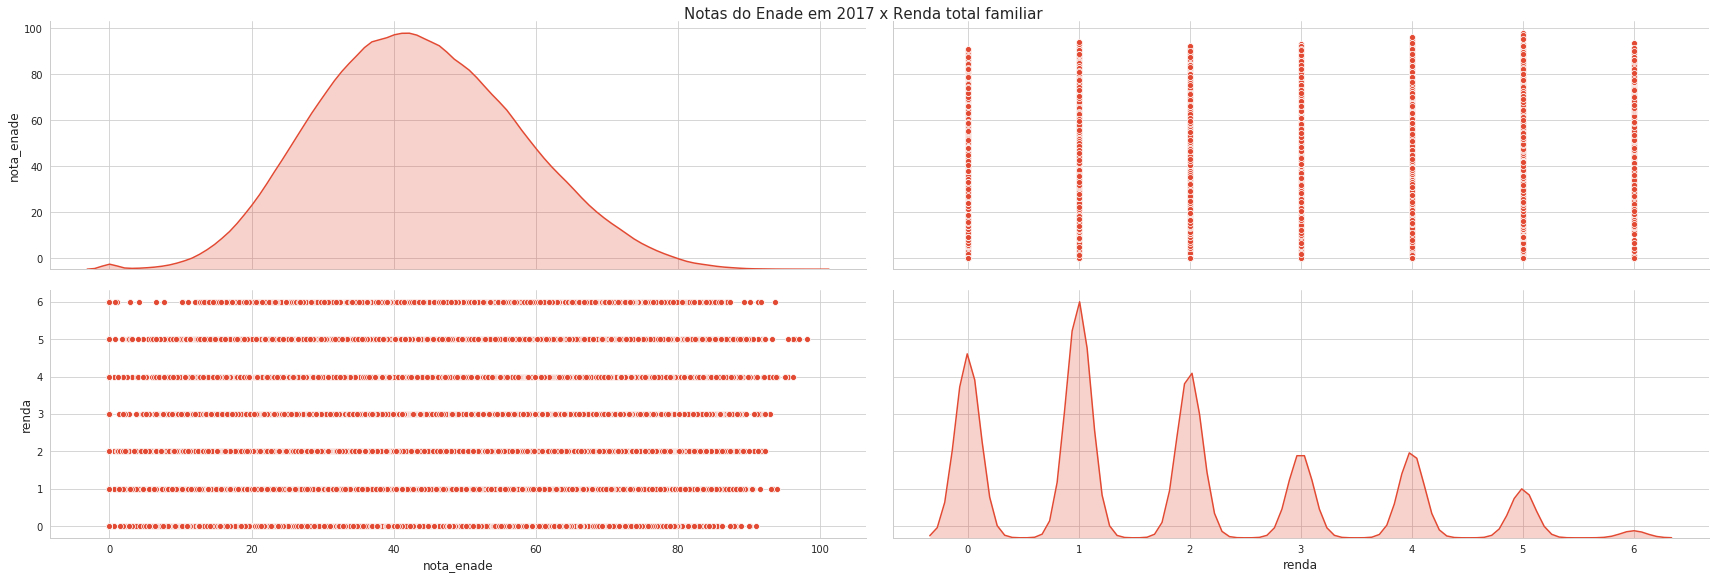

In [62]:
gph = sns.pairplot(dados_filtrados, diag_kind='kde', height=4, aspect=3)
gph.fig.suptitle('Notas do Enade em 2017 x Renda total familiar', y=1.00, fontsize=15)
plt.show()

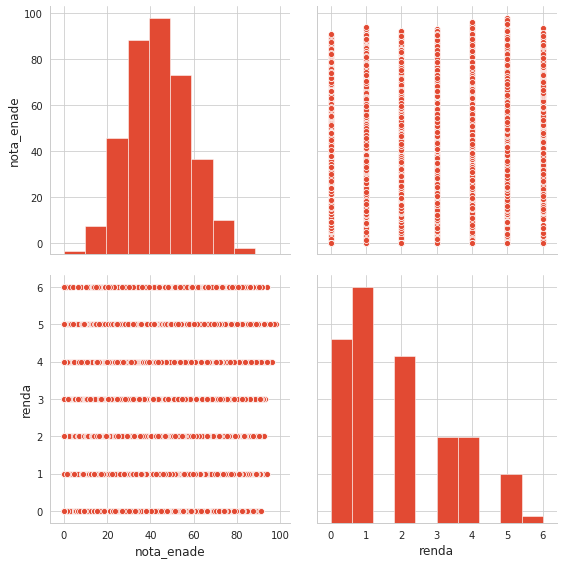

In [25]:
sns.pairplot(dados_filtrados, height=4)
plt.show()

In [26]:
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442868 entries, 0 to 534919
Data columns (total 2 columns):
nota_enade    442868 non-null float64
renda         442868 non-null int64
dtypes: float64(1), int64(1)
memory usage: 30.1 MB


In [27]:
# Importando a biblioteca necessária
from scipy.stats import pearsonr, spearmanr, kendalltau

In [30]:
# Calculando a correlação de pearson
x = dados_filtrados.renda
y = dados_filtrados.nota_enade
coef, p = pearsonr(x,y)
print('Correlação de pearson: %.2f' % coef)
coef, p = spearmanr(x,y)
print('Correlação de spearman: %.2f' % coef)
coef, p = kendalltau(x,y)
print('Correlação de kendall: %.2f' % coef)

Correlação de pearson: 0.21
Correlação de spearman: 0.20
Correlação de kendall: 0.15
